# **Enhancing Stock Price Prediction: A Transition from Linear Regression to CNN**

# **About Dataset:**
- Dataset contains daily Opening price, High price, Low price, Closing price, Number of shares, Number of trades, etc. of TATA STEEL Ltd stock from (03-july-2015 till 02-july-2021).
- Other Features : Date, Open Price, High Price, Low Price, WAP, No.of Shares, No. of Trades, Total Turnover, Deliverable Quantity, Deli. Qty to Traded Qty, Spread High-Low, Spread Close-Open
- Target Feature : Close price

# **Implementations**
1.  Importing all the required libraries
2.  Data Extraction - Collected the data from Kaggle.
3.  Data Preprocessing - Null Values and checking features datatypes
4.  Exploratory Data Analysis - Used Seaborn & Matplotlib
5.  Feature Scaling - Normalizing the top corelated data with Minmax Scaler
6.  Data split - 80:20 split as Train-Test Split.
7.  Prediction Model - Linear Regression, ANN, CNN
8.  Model Evaluation - Calculated the metric Accuracy
9.  Model Comparison - Compared the accuracy of all models
10. Converting data - To a time series format
11. Prediction Model - LSTM, ANN, CNN
12. Model Evaluation - Calculated the metric Accuracy
13. Model Comparison - Compared the accuracy of all models

# **1. Importing all the required libraries**

In [1]:
# Data Preprocessing
import numpy as np
import pandas as pd

# Exploratory Data Analysis
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Data Modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import LSTM

# Model Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


# **2. Data Extraction - Collected the data from Kaggle.**

In [2]:
df = pd.read_csv("/content/Tata-steel.csv")
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,03-Jul-15,308.00,308.00,299.75,300.95,302.708180,499554,6430,151219082,118810.0,23.78,8.25,-7.05
1,06-Jul-15,294.90,299.60,292.30,298.75,295.646338,663354,9184,196118181,117663.0,17.74,7.30,3.85
2,07-Jul-15,300.75,303.25,296.00,297.45,299.477691,877207,8581,262703927,211277.0,24.09,7.25,-3.30
3,08-Jul-15,293.80,294.00,282.00,283.40,286.875105,1446189,20272,414875621,563505.0,38.96,12.00,-10.40
4,09-Jul-15,285.20,287.25,279.60,280.55,282.860975,974983,13946,275784642,330248.0,33.87,7.65,-4.65


In [3]:
df.tail()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
1480,28-Jun-21,1174.95,1189.20,1163.2,1184.05,1179.142175,749944,14773,884290599,112782.0,15.04,26.00,9.10
1481,29-Jun-21,1186.00,1195.00,1165.5,1172.45,1177.493063,675052,18471,794869047,197679.0,29.28,29.50,-13.55
1482,30-Jun-21,1179.50,1190.95,1162.5,1166.85,1180.272142,326616,8916,385495766,44078.0,13.50,28.45,-12.65
1483,01-Jul-21,1170.05,1176.55,1156.9,1163.35,1166.601920,351105,10332,409599767,66928.0,19.06,19.65,-6.70
1484,02-Jul-21,1165.00,1166.50,1130.5,1135.95,1145.869906,382616,10128,438428160,105980.0,27.70,36.00,-29.05


In [4]:
df=df.drop(['WAP','No.of Shares','No. of Trades','Total Turnover (Rs.)','% Deli. Qty to Traded Qty','Spread High-Low','Spread Close-Open'],axis=1)

# **3. Data Preprocessing - Null Values and checking features datatypes**

In [5]:
df.describe()

,Open Price,High Price,Low Price,Close Price,Deliverable Quantity
count,1485.000000,1485.000000,1485.000000,1485.000000,1.484000e+03
mean,486.573131,494.064949,478.727879,486.225926,1.589507e+05
std,187.045761,189.642821,184.183050,187.008913,1.511723e+05
min,205.050000,206.250000,200.000000,201.350000,1.960800e+04
25%,355.650000,360.550000,346.700000,354.250000,7.098925e+04
50%,470.550000,477.000000,463.350000,469.550000,1.136155e+05
75%,581.000000,587.500000,572.100000,579.800000,1.883652e+05
max,1231.000000,1246.800000,1200.000000,1233.900000,1.779684e+06


In [6]:
# showing column wise %ge of NaN values they contains

for i in df.columns:
    print(i,"-", round(df[i].isna().mean()*100))

Date - 0
Open Price - 0
High Price - 0
Low Price - 0
Close Price - 0
Deliverable Quantity - 0


#### There is no null values

# Changing the Date DataType

In [7]:
print(df['Date'])

0       03-Jul-15
1       06-Jul-15
2       07-Jul-15
3       08-Jul-15
4       09-Jul-15
          ...    
1480    28-Jun-21
1481    29-Jun-21
1482    30-Jun-21
1483    01-Jul-21
1484    02-Jul-21
Name: Date, Length: 1485, dtype: object


In [8]:
start_date = pd.to_datetime(df.Date[0])
end_date = pd.to_datetime(df.Date.values[-1])
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
print(df['Date'])

0      2015-07-03
1      2015-07-06
2      2015-07-07
3      2015-07-08
4      2015-07-09
          ...    
1480   2021-06-28
1481   2021-06-29
1482   2021-06-30
1483   2021-07-01
1484   2021-07-02
Name: Date, Length: 1485, dtype: datetime64[ns]


# **4. Exploratory Data Analysis - Used Seaborn & Matplotlib**
## Visualization statistics of 5 years
# 1. Open

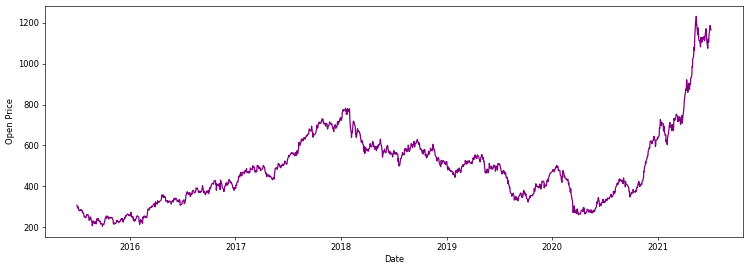

In [10]:
plt.figure(figsize=(15, 5), dpi=60)
sns.lineplot(data=df, x="Date", y="Open Price",color="Purple")
plt.show()

- llustrating how the "Open" prices change over time

# 2.Close

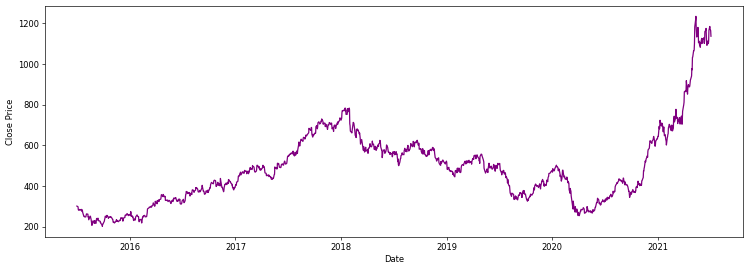

In [11]:
plt.figure(figsize=(15, 5), dpi=60)
sns.lineplot(data=df, x="Date", y="Close Price",color="Purple")
plt.show()

- llustrating how the "Close" prices change over time

# 3.High

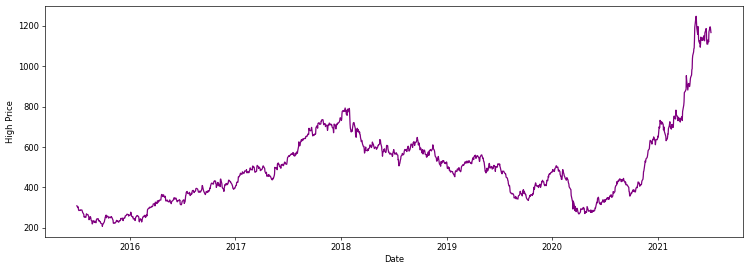

In [12]:
plt.figure(figsize=(15, 5), dpi=60)
sns.lineplot(data=df, x="Date", y="High Price",color="Purple")
plt.show()

- llustrating how the "High" prices change over time

# 4.Low

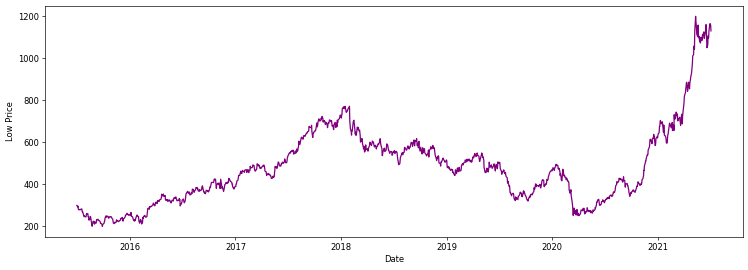

In [13]:
plt.figure(figsize=(15, 5), dpi=60)
sns.lineplot(data=df, x="Date", y="Low Price",color="Purple")
plt.show()

- llustrating how the "Low" prices change over time

#### The "Change" column will contain the percentage change from the "Open" price to the "Close" price, rounded to two decimal places, with 100 subtracted to express it as a percentage relative to the "Open" price.

In [14]:
df['Change'] = round(- 100 +(df["Close Price"] * 100 / df["Open Price"]),2)

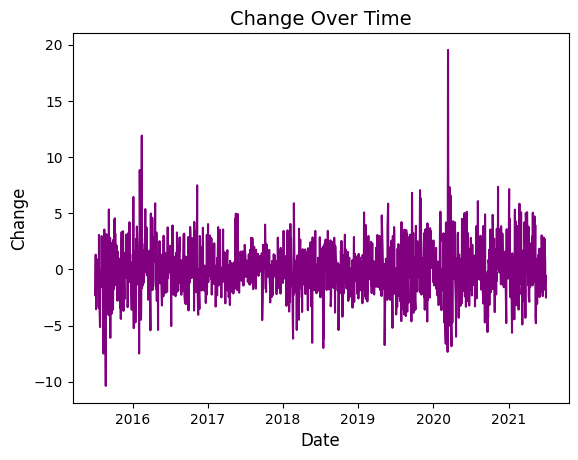

In [15]:
# Convert the DataFrame to a tidy format
tidy_df = df.melt(id_vars="Date", value_vars="Change", var_name="Variable", value_name="Value")
#convert the original DataFrame into a tidy format using the melt function. This creates a DataFrame with "Date," "Variable" (which is "Change" in this case), and "Value" columns.

# Use Seaborn to create the line plot
sns.lineplot(data=tidy_df, x="Date", y="Value",color="Purple")

plt.xlabel("Date", fontsize=12)
plt.ylabel("Change", fontsize=12)
plt.title("Change Over Time", fontsize=14)
plt.show()

- The resulting plot shows a line graph with the "Date" column on the x-axis and the "Change" column on the y-axis.
- Illustrating how the "Change" values change over time.

## Try to group them by Month and Year to see better.

The provided code performs the following operations using a DataFrame df with a "Date" column:

1. df.set_index("Date"): This sets the "Date" column as the index of the DataFrame, effectively making it a time series dataset.

2. groupby(pd.Grouper(freq="M")): It groups the data by month using the pd.Grouper with a frequency of "M," which stands for month. This means the data will be grouped into monthly intervals.

3. .mean(): After grouping the data by month, it calculates the mean (average) for each of the grouped intervals. This operation computes the average values for each column within each month.

4. per_month = per_month.reset_index(): It resets the index of the resulting DataFrame, per_month, so that the "Date" column becomes a regular column again. This step is often performed to make further analysis or visualization easier.

So, after executing this code, the per_month DataFrame will contain the monthly averages for each column in the original DataFrame df. This is helpful for summarizing data on a monthly basis, especially in time series analysis.

In [16]:
per_month = df.set_index("Date").groupby(pd.Grouper(freq = "M")).mean()
per_month = per_month.reset_index()

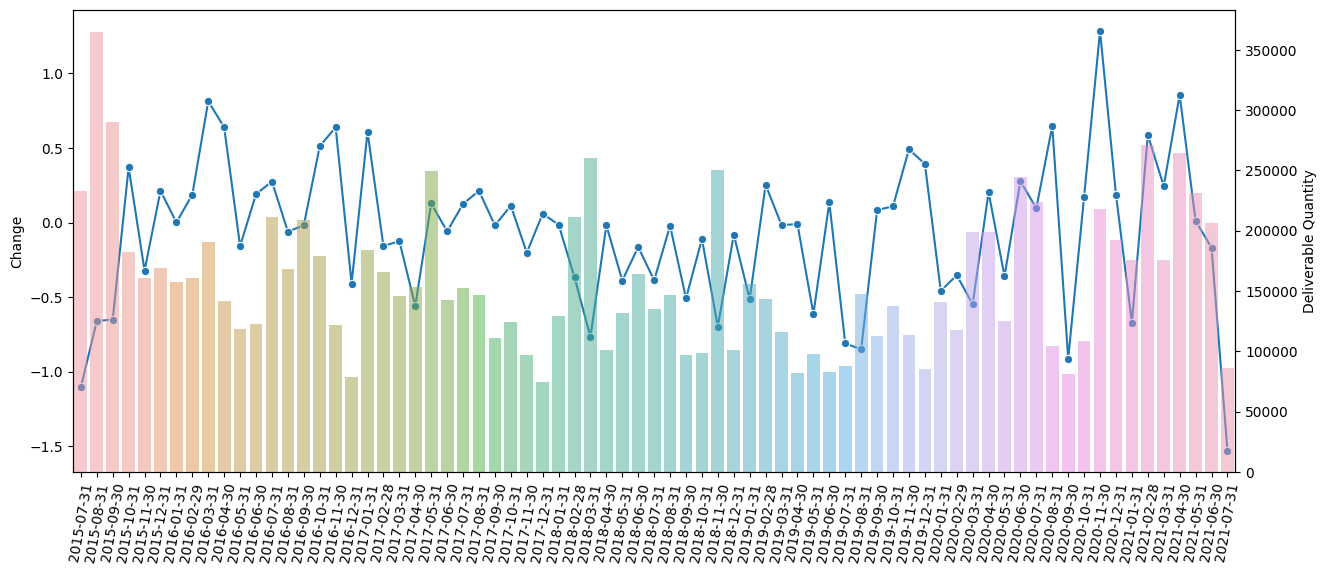

In [17]:
fig, ax1 = plt.subplots(figsize=(15,6))

sns.lineplot(data = per_month["Change"] , marker='o', sort = False, ax=ax1)
plt.xticks(rotation = 80) # rotates the x-axis (date) tick labels for better readability.
ax2 = ax1.twinx() # creates a secondary axis (ax2) that shares the same x-axis with ax1. This is necessary to overlay a bar plot on the same chart.
sns.barplot(data = per_month, x = per_month['Date'].dt.date, y = 'Deliverable Quantity', alpha = 0.5, ax = ax2)

plt.show()

- The resulting plot have two y-axes: the left one corresponds to the line plot showing changes, and the right one corresponds to the bar plot showing volume.
- This allows to visualize the relationship between changes and volume over time.

- The resulting plot shows a line graph with the "Date" column on the x-axis and both the "Open" and "Close" prices on the y-axis.
- Illustrating how these prices change over time.

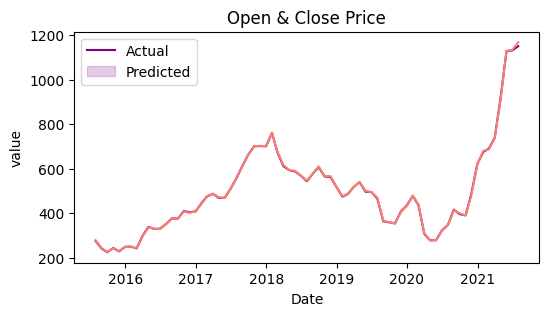

In [18]:
plt.figure(figsize=(6, 3))

# Define custom colors for 'Actual Value' and 'Predictions'
colors = ["Purple", "Salmon"]
sns.lineplot(x = "Date", y = "value",hue = "variable", data = pd.melt(per_month[["Close Price","Open Price","Date"]],["Date"]),palette=colors, dashes=True)
plt.title("Open & Close Price")
plt.legend(['Actual', 'Predicted'])
#plt.xticks(rotation = 0)
plt.show()

# Checking the relation between the input and target variables
# our target variable is close price

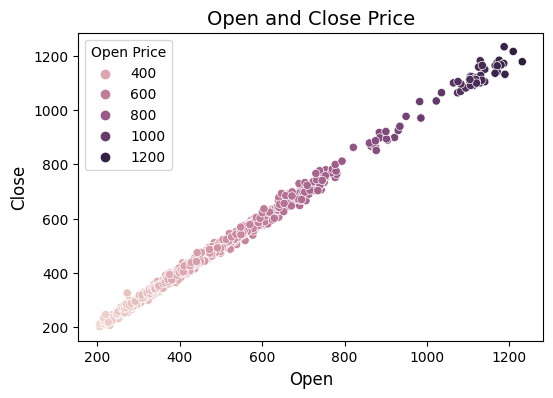

In [19]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Open Price', y='Close Price', data=df,hue='Open Price')

plt.xlabel('Open', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.title('Open and Close Price', fontsize=14)

plt.show()

Open and close are highly correlated

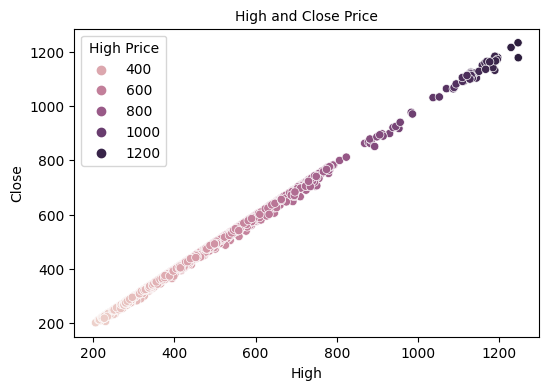

In [20]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='High Price', y='Close Price', data=df,hue='High Price')

plt.xlabel('High', fontsize=10)
plt.ylabel('Close', fontsize=10)
plt.title('High and Close Price', fontsize=10)

plt.show()

High and close are highly correlated

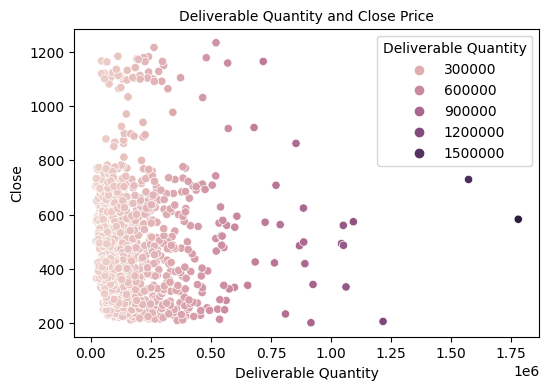

In [21]:
# Scatter Plot Between Volume and Low
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Deliverable Quantity', y='Close Price', data=df,hue='Deliverable Quantity')

plt.xlabel('Deliverable Quantity', fontsize=10)
plt.ylabel('Close', fontsize=10)
plt.title('Deliverable Quantity and Close Price', fontsize=10)

plt.show()

Volume and close are not much correlated

<ipython-input-22-138503d5cada>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormap = df.corr()


<Axes: >

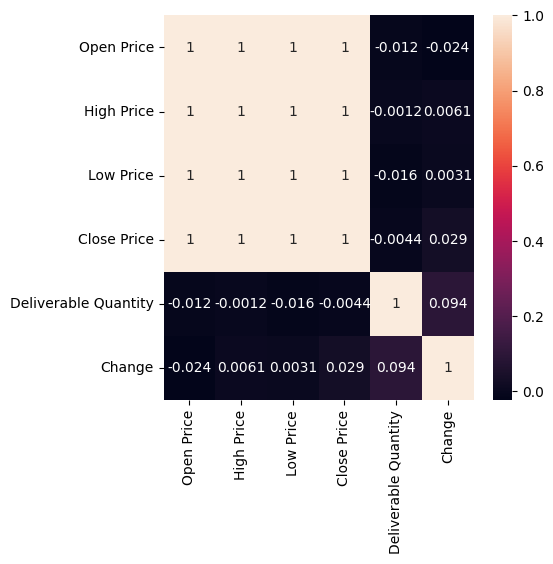

In [22]:
cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [23]:
def get_corelated_col(cor_dat, threshold):
  # Cor_data to be column along which corelation to be measured
  #Threshold be the value above which of corelation to considered
    feature=[]
    value=[]
    for i ,index in enumerate(cor_dat.index):
        if abs(cor_dat[index]) > threshold:
            feature.append(index)
            value.append(cor_dat[index])

    df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
    return df

In [24]:
top_corelated_values = get_corelated_col(cormap['Close Price'], 0.60)
top_corelated_values

,corr value
Open Price,0.998317
High Price,0.999407
Low Price,0.999231
Close Price,1.000000


Looks like all colums except volume are highly co-related. Using them for predictions.

In [25]:
df = df[top_corelated_values.index]
df.head()

,Open Price,High Price,Low Price,Close Price
0,308.00,308.00,299.75,300.95
1,294.90,299.60,292.30,298.75
2,300.75,303.25,296.00,297.45
3,293.80,294.00,282.00,283.40
4,285.20,287.25,279.60,280.55


In [26]:
df.shape

(1485, 4)

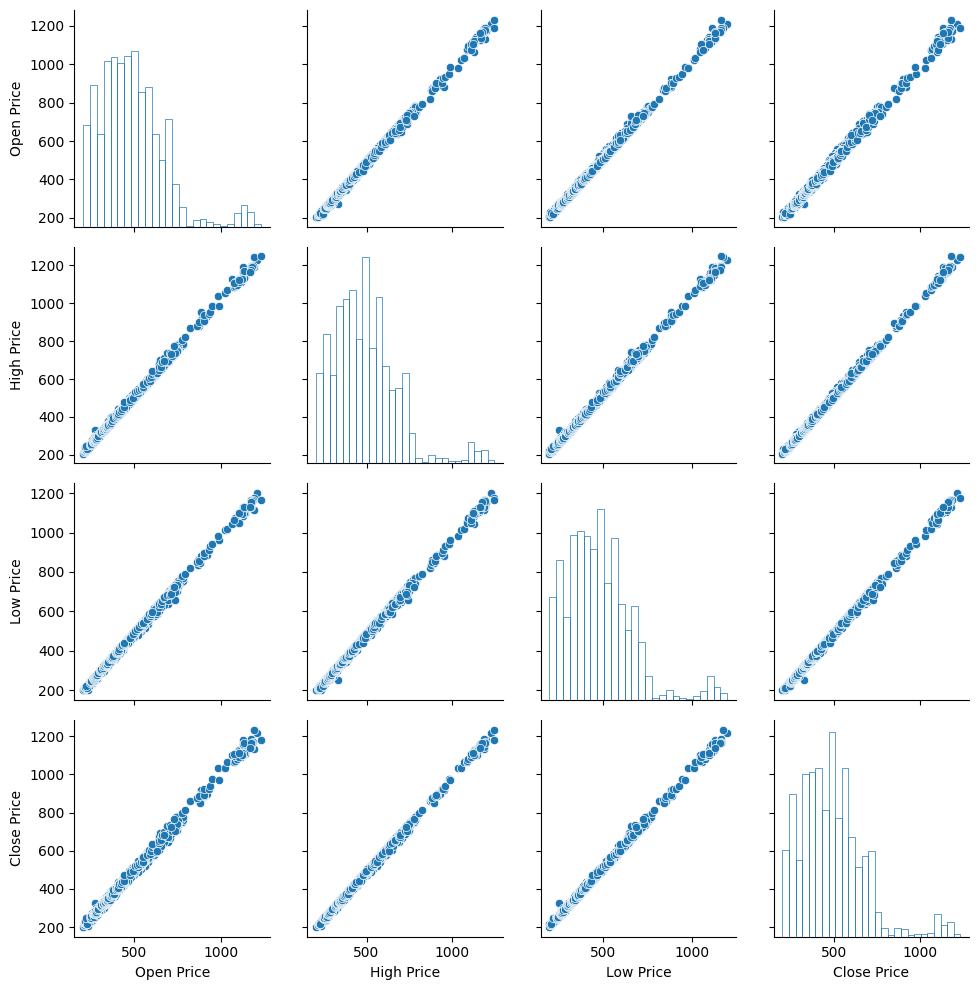

In [27]:
sns.pairplot(df,diag_kws=dict(fill=False))
plt.tight_layout()

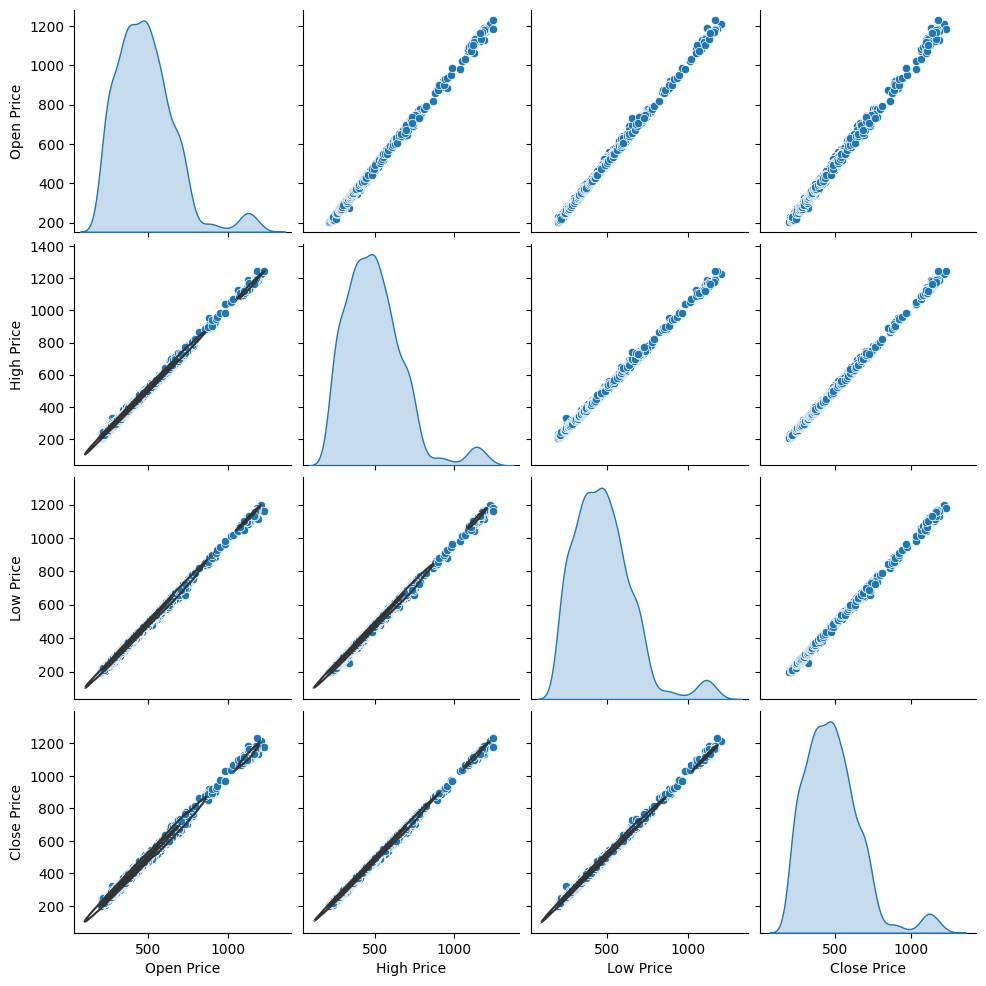

In [28]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

Since other parameters have linear relationship with close, we are using some linear models fore prediction

In [29]:
X = df.drop(['Close Price'], axis=1)
y = df['Close Price']

# **5. Feature Scaling - Normalizing the top corelated data**
### Normalization with Minmax Scaler

Since range of data in different columns veries significantly we need to scale the independent variable i.e. X. For this we will use Min-Max Scaling.

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Open Price,High Price,Low Price
0,0.100346,0.097785,0.09975
1,0.087577,0.089712,0.09230
2,0.093279,0.093220,0.09600
3,0.086505,0.084330,0.08200
4,0.078123,0.077843,0.07960


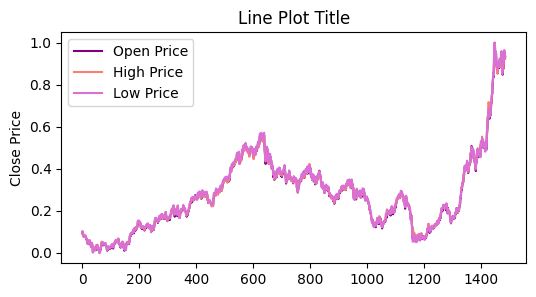

In [32]:
plt.figure(figsize=(6, 3))
plt.ylabel('Close Price', fontsize=10)

# Define custom colors for 'Actual Value' and 'Predictions'
colors = ["Purple", "Salmon","orchid"]

sns.lineplot(data=X, dashes=False, palette=colors)
plt.title('Line Plot Title')
plt.show()

#  **6. Data split - 80:20 split as Train-Test Split**

In [33]:
# split data in test train pairs

from sklearn.model_selection import train_test_split

In [34]:
# Setting Train:Test ratio as 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [35]:
print("X_train = ",X_train.shape)
print("X_test  = ",X_test.shape)
print("Y_train = ",y_train.shape)
print("Y_test  = ",y_test.shape)

X_train =  (1188, 3)
X_test  =  (297, 3)
Y_train =  (1188,)
Y_test  =  (297,)


# **7. Prediction Model - Linear Regression, ANN, CNN**

# 1. Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [38]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
1188,273.55,272.180619
1189,282.50,281.518998
1190,298.45,301.615844
1191,273.70,273.850897
1192,272.70,275.929800


# **8. Model Evaluation - Calculated the metric Accuracy**

In [39]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

In [40]:

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9995098683663972


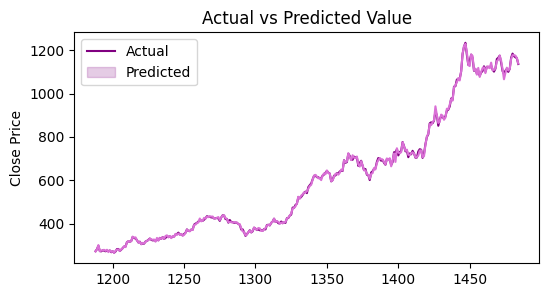

In [41]:
plt.figure(figsize=(6, 3))
plt.ylabel('Close Price', fontsize=10)

# Define custom colors for 'Actual Value' and 'Predictions'
colors = ["Purple", "orchid"]

sns.lineplot(data=pred_df, dashes=False, palette=colors)
plt.title("Actual vs Predicted Value")
plt.legend(['Actual', 'Predicted'])
plt.show()

# 2. ANN

In [42]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

In [43]:
def regressor(inp_dim):

    model = Sequential()

    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [44]:
# Model Training

model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
30/30 [==============================] - 6s 10ms/step - loss: 241662.8594 - val_loss: 170981.7500
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 241566.0156 - val_loss: 170840.3750
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 241217.4375 - val_loss: 170349.9531
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 240083.1875 - val_loss: 168937.8438
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 237167.9219 - val_loss: 165629.6406
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 230835.0625 - val_loss: 159075.8594
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 219260.8281 - val_loss: 147728.8438
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 200199.0938 - val_loss: 130356.4766
Epoch 9/100
30/30 [==============================] - 0s 4ms/step - loss: 172753.9375 - val_loss: 106342.4375
Epoch 10/100
30/30

In [45]:
# Prediction

y_pred_2 = model_2.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [46]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
1188,273.55,273.594788
1189,282.50,278.266296
1190,298.45,294.970734
1191,273.70,281.975494
1192,272.70,278.163788


In [47]:
# Measure the Accuracy Score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9986261423065658


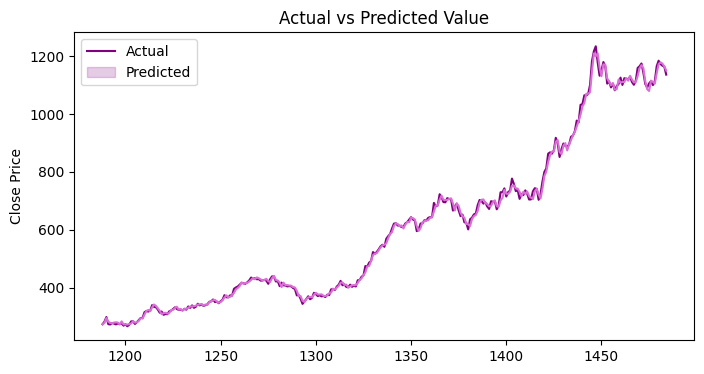

In [48]:
plt.figure(figsize=(8, 4))
plt.ylabel('Close Price', fontsize=10)

# Define custom colors for 'Actual Value' and 'Predictions'
colors = ["Purple", "orchid"]

sns.lineplot(data=pred_df, dashes=False, palette=colors)
plt.title("Actual vs Predicted Value")
plt.legend(['Actual', 'Predicted'])
plt.show()

# 3. CNN

In [49]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [50]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [51]:
def reg():

    model = Sequential()

    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))

    model.add(Flatten())

    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [52]:
# Model Training

model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
30/30 [==============================] - 7s 20ms/step - loss: 240222.8750 - val_loss: 164834.0469
Epoch 2/100
30/30 [==============================] - 0s 6ms/step - loss: 155008.3906 - val_loss: 1224.1431
Epoch 3/100
30/30 [==============================] - 0s 6ms/step - loss: 6130.1426 - val_loss: 230.4900
Epoch 4/100
30/30 [==============================] - 0s 6ms/step - loss: 811.1295 - val_loss: 259.3304
Epoch 5/100
30/30 [==============================] - 0s 6ms/step - loss: 363.2297 - val_loss: 232.8587
Epoch 6/100
30/30 [==============================] - 0s 6ms/step - loss: 215.6199 - val_loss: 152.3871
Epoch 7/100
30/30 [==============================] - 0s 6ms/step - loss: 132.4045 - val_loss: 98.6438
Epoch 8/100
30/30 [==============================] - 0s 6ms/step - loss: 82.6179 - val_loss: 76.8295
Epoch 9/100
30/30 [==============================] - 0s 6ms/step - loss: 56.7219 - val_loss: 61.0302
Epoch 10/100
30/30 [==============================] - 0s 6ms/step 

In [53]:
# Prediction

y_pred_3 = model_3.predict(X_test)

10/10 [==============================] - 0s 9ms/step


In [54]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
1188,273.55,272.243378
1189,282.50,277.708740
1190,298.45,294.734100
1191,273.70,280.608551
1192,272.70,277.026001


In [55]:
# Measure the Accuracy Score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9988174014668254


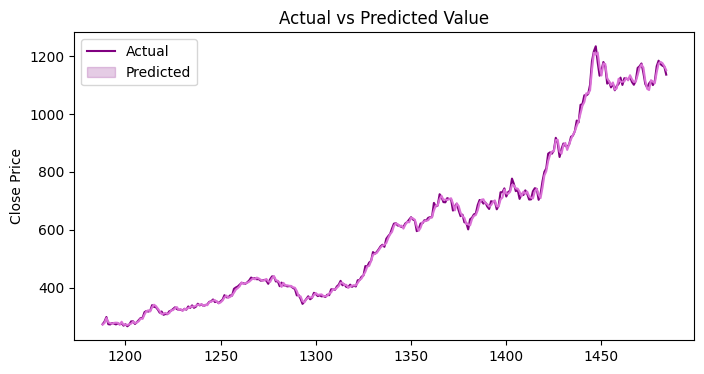

In [56]:
plt.figure(figsize=(8, 4))
plt.ylabel('Close Price', fontsize=10)

# Define custom colors for 'Actual Value' and 'Predictions'
colors = ["Purple", "orchid"]

sns.lineplot(data=pred_df, dashes=False, palette=colors)
plt.title("Actual vs Predicted Value")
plt.legend(['Actual', 'Predicted'])
plt.show()

# **9. Model Comparison - Compared the accuracy of all models**

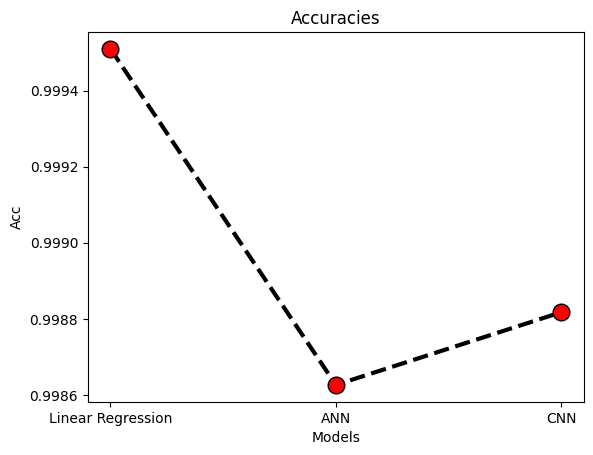

In [57]:
plt.plot(range(3), Acc, color='black', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=12)
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()

# **10. Converting data - To a time series format**
## Now converting data in a time series data and applying some more models.

- Converting normal data to a time series format is necessary when the data has a temporal component or exhibits time-dependent trends.
- Time series data captures sequential dependencies, enabling forecasting and anomaly detection.
- This conversion helps uncover hidden patterns and facilitates effective visualization of temporal changes.

In [58]:
close = df.reset_index()['Close Price']
close.head()

0    300.95
1    298.75
2    297.45
3    283.40
4    280.55
Name: Close Price, dtype: float64

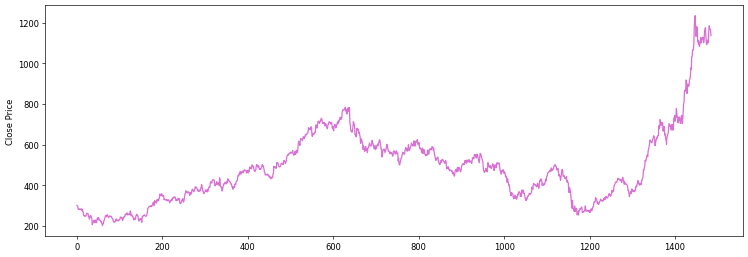

In [59]:
plt.figure(figsize=(15, 5), dpi=60)
sns.lineplot(close,color="orchid")
plt.show()

In [60]:
time_step = 30 # creating sequences of 30 data points
X, y = [], [] # to store the input sequences and target values

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)]) # added to the X list as one input sequence
    y.append(close[(i+time_step)])   # target value corresponding to the input sequence

X = np.array(X)  # # X and y lists are converted into NumPy arrays
y = np.array(y)  # This is a common practice because many machine learning libraries, including TensorFlow and scikit-learn, expect data to be in NumPy array format for training models.

In [61]:
X[:5]

array([[300.95, 298.75, 297.45, 283.4 , 280.55, 280.95, 284.45, 281.7 ,
        280.7 , 281.5 , 284.3 , 284.  , 274.65, 280.35, 270.3 , 265.1 ,
        251.4 , 249.35, 250.65, 248.35, 247.3 , 248.  , 256.4 , 262.25,
        261.3 , 262.05, 261.15, 246.9 , 249.1 , 233.6 ],
       [298.75, 297.45, 283.4 , 280.55, 280.95, 284.45, 281.7 , 280.7 ,
        281.5 , 284.3 , 284.  , 274.65, 280.35, 270.3 , 265.1 , 251.4 ,
        249.35, 250.65, 248.35, 247.3 , 248.  , 256.4 , 262.25, 261.3 ,
        262.05, 261.15, 246.9 , 249.1 , 233.6 , 237.1 ],
       [297.45, 283.4 , 280.55, 280.95, 284.45, 281.7 , 280.7 , 281.5 ,
        284.3 , 284.  , 274.65, 280.35, 270.3 , 265.1 , 251.4 , 249.35,
        250.65, 248.35, 247.3 , 248.  , 256.4 , 262.25, 261.3 , 262.05,
        261.15, 246.9 , 249.1 , 233.6 , 237.1 , 246.55],
       [283.4 , 280.55, 280.95, 284.45, 281.7 , 280.7 , 281.5 , 284.3 ,
        284.  , 274.65, 280.35, 270.3 , 265.1 , 251.4 , 249.35, 250.65,
        248.35, 247.3 , 248.  , 256.4

In [62]:
y[:5]

array([237.1 , 246.55, 251.65, 249.9 , 241.65])

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.096460,0.094330,0.093071,0.079463,0.076703,0.077091,0.080480,0.077817,0.076849,0.077623,...,0.044501,0.045179,0.053315,0.058980,0.058060,0.058786,0.057915,0.044114,0.046245,0.031233
1,0.094330,0.093071,0.079463,0.076703,0.077091,0.080480,0.077817,0.076849,0.077623,0.080335,...,0.045179,0.053315,0.058980,0.058060,0.058786,0.057915,0.044114,0.046245,0.031233,0.034623
2,0.093071,0.079463,0.076703,0.077091,0.080480,0.077817,0.076849,0.077623,0.080335,0.080045,...,0.053315,0.058980,0.058060,0.058786,0.057915,0.044114,0.046245,0.031233,0.034623,0.043775
3,0.079463,0.076703,0.077091,0.080480,0.077817,0.076849,0.077623,0.080335,0.080045,0.070989,...,0.058980,0.058060,0.058786,0.057915,0.044114,0.046245,0.031233,0.034623,0.043775,0.048714
4,0.076703,0.077091,0.080480,0.077817,0.076849,0.077623,0.080335,0.080045,0.070989,0.076510,...,0.058060,0.058786,0.057915,0.044114,0.046245,0.031233,0.034623,0.043775,0.048714,0.047020


# **11. Prediction Model - LSTM, ANN, CNN**

In [64]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

# 1. LSTM

In [65]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [66]:
from tensorflow.keras.layers import LSTM

In [67]:
def Reg():
    model = Sequential()

    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [68]:
# Model Training

model_1 = Reg()
model_1.fit(X_train_, y_train, epochs=10000, validation_split=0.2)

Streaming output truncated to the last 5000 lines.
30/30 [==============================] - 0s 15ms/step - loss: 0.1626 - val_loss: 1453.1208
Epoch 7502/10000
30/30 [==============================] - 0s 14ms/step - loss: 0.1470 - val_loss: 1459.7192
Epoch 7503/10000
30/30 [==============================] - 0s 15ms/step - loss: 0.0859 - val_loss: 1463.0872
Epoch 7504/10000
30/30 [==============================] - 0s 13ms/step - loss: 0.0830 - val_loss: 1464.2802
Epoch 7505/10000
30/30 [==============================] - 0s 13ms/step - loss: 0.0773 - val_loss: 1465.8809
Epoch 7506/10000
30/30 [==============================] - 0s 13ms/step - loss: 0.0694 - val_loss: 1462.2732
Epoch 7507/10000
30/30 [==============================] - 0s 13ms/step - loss: 0.0636 - val_loss: 1468.2349
Epoch 7508/10000
30/30 [==============================] - 0s 14ms/step - loss: 0.0777 - val_loss: 1475.2102
Epoch 7509/10000
30/30 [==============================] - 0s 13ms/step - loss: 0.6283 - val_loss: 1429

In [69]:
# Prediction

y_pred_1 = model_1.predict(X_test_)

10/10 [==============================] - 1s 4ms/step


In [70]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,277.65,228.301758
1,275.85,244.860962
2,272.85,254.051666
3,276.20,251.373688
4,273.85,254.062958


# **12. Model Evaluation - Calculated the metric Accuracy**

In [71]:
# Measure the Accuracy Score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.691307103161986


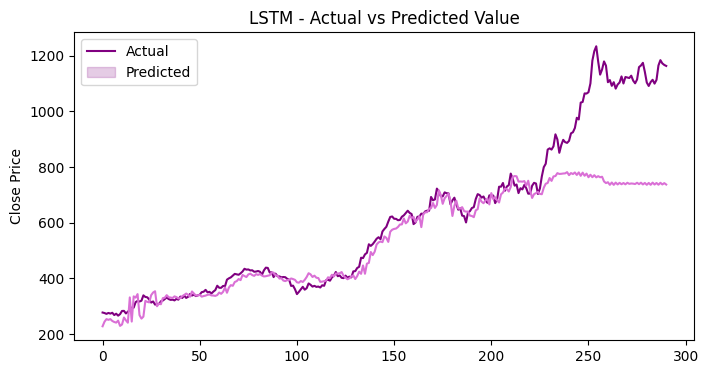

In [73]:
plt.figure(figsize=(8,4))
plt.ylabel('Close Price', fontsize=10)

# Define custom colors for 'Actual Value' and 'Predictions'
colors = ["Purple", "orchid"]

sns.lineplot(data=pred_df, dashes=False, palette=colors)
plt.title("LSTM - Actual vs Predicted Value")
plt.legend(['Actual', 'Predicted'])
plt.show()

# 2. ANN

In [74]:
# Model Training

model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
30/30 [==============================] - 1s 8ms/step - loss: 246984.2188 - val_loss: 166524.5000
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 246853.1406 - val_loss: 166315.9844
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 246097.0625 - val_loss: 165279.6719
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 242944.7500 - val_loss: 161700.3906
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 233774.8281 - val_loss: 152457.7344
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 212545.7656 - val_loss: 133531.2812
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 174283.4062 - val_loss: 102467.8047
Epoch 8/100
30/30 [==============================] - 0s 5ms/step - loss: 119301.4453 - val_loss: 63340.0039
Epoch 9/100
30/30 [==============================] - 0s 5ms/step - loss: 60828.6484 - val_loss: 27280.9531
Epoch 10/100
30/30 [==

In [75]:
# Prediction

y_pred_2 = model_2.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [76]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
0,277.65,282.657227
1,275.85,282.568298
2,272.85,282.562103
3,276.20,281.984619
4,273.85,282.075256


In [77]:
# Measure the Accuracy Score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9527832862029295


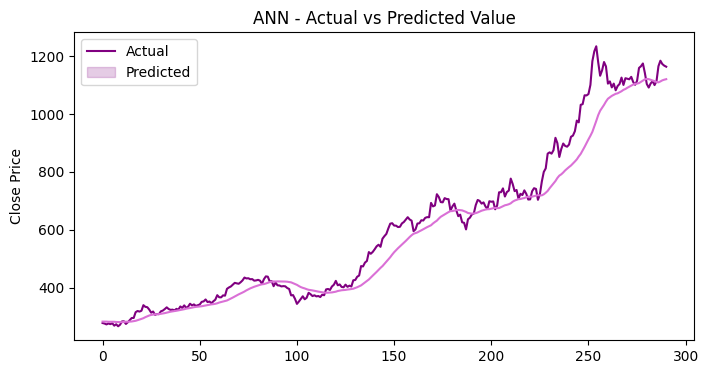

In [79]:
plt.figure(figsize=(8,4))
plt.ylabel('Close Price', fontsize=10)

# Define custom colors for 'Actual Value' and 'Predictions'
colors = ["Purple", "orchid"]

sns.lineplot(data=pred_df, dashes=False, palette=colors)
plt.title("ANN - Actual vs Predicted Value")
plt.legend(['Actual', 'Predicted'])
plt.show()

# 3. CNN

In [80]:
# Model Training

model_3 = reg()
model_3.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
30/30 [==============================] - 2s 17ms/step - loss: 184240.8594 - val_loss: 7186.5166
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 10164.9902 - val_loss: 5238.1665
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 1381.5032 - val_loss: 2035.3337
Epoch 4/100
30/30 [==============================] - 0s 6ms/step - loss: 928.3071 - val_loss: 2500.0083
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 861.4371 - val_loss: 2068.4690
Epoch 6/100
30/30 [==============================] - 0s 6ms/step - loss: 864.4250 - val_loss: 2116.3557
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 841.2042 - val_loss: 2194.3508
Epoch 8/100
30/30 [==============================] - 0s 6ms/step - loss: 846.2099 - val_loss: 2162.7969
Epoch 9/100
30/30 [==============================] - 0s 6ms/step - loss: 838.3000 - val_loss: 2567.4097
Epoch 10/100
30/30 [==============================] - 0s 

In [81]:
# Prediction

y_pred_3 = model_3.predict(X_test_)

10/10 [==============================] - 0s 10ms/step


In [82]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,277.65,281.218445
1,275.85,281.248901
2,272.85,280.986450
3,276.20,279.563293
4,273.85,279.711761


In [83]:
# Measure the Accuracy Score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9909648397511246


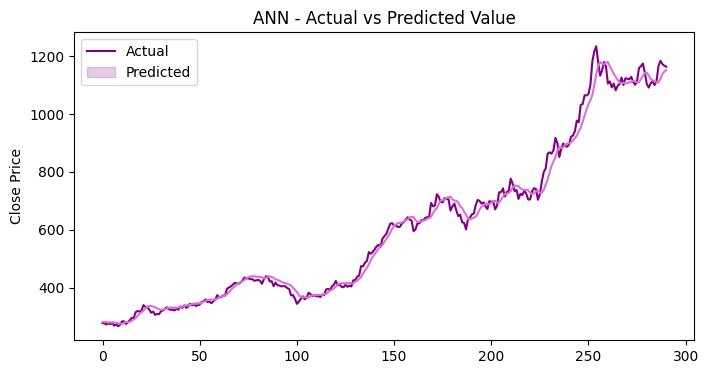

In [84]:
plt.figure(figsize=(8,4))
plt.ylabel('Close Price', fontsize=10)

# Define custom colors for 'Actual Value' and 'Predictions'
colors = ["Purple", "orchid"]

sns.lineplot(data=pred_df, dashes=False, palette=colors)
plt.title("ANN - Actual vs Predicted Value")
plt.legend(['Actual', 'Predicted'])
plt.show()

# **13. Model Comparison - Compared the accuracy of all models**

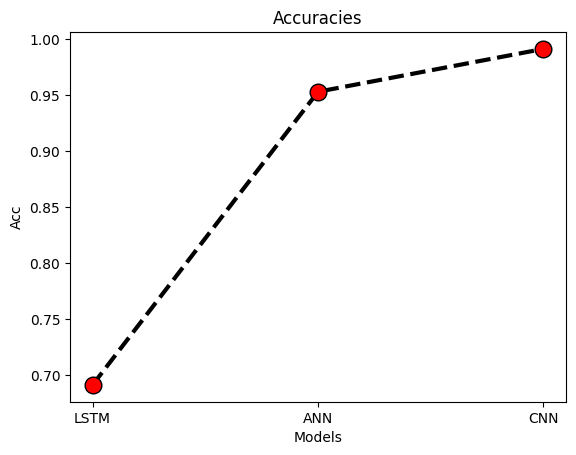

In [86]:
plt.plot(range(3),Acc, color='black', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=12)
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'ANN', 'CNN'])
plt.show()

# **Conclusion**
The transition from linear regression to CNN for stock price prediction can be attributed to the following factors:

1. Complex Patterns: Stock prices exhibit intricate, non-linear patterns and dependencies. Linear regression struggles to capture such complexity, while CNN excels in identifying intricate spatial and temporal patterns.

2. Temporal Transformation: Converting data to a time series format highlights the significance of temporal dependencies. LSTM and CNN models are specifically designed for time series data, enabling them to leverage temporal information effectively.

3. Automatic Feature Extraction: CNNs automatically learn and extract relevant features from the raw data, providing better representation of intricate stock price patterns.

4. Nonlinearity: CNNs are inherently non-linear models, making them more suitable for modeling the non-linear relationships in stock prices.

5. Model Capacity: CNNs have greater model complexity and capacity to capture complex, multi-dimensional relationships, which is beneficial for capturing the intricate behavior of stock prices.